In [ ]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
df1=pd.read_csv('/content/SMS_train (1) (1).csv',encoding='ISO-8859-1')
df2=pd.read_csv('/content/SMS_test (2) (1).csv',encoding='Iso-8859-1')
df=pd.concat([df1,df2])

df

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [ ]:
df1.shape

(957, 3)

In [ ]:
df2.shape

(125, 3)

In [ ]:
df.reset_index(drop=True,inplace=True)#to correct index
df

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
1077,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,122,Try to do something dear. You read something f...,Non-Spam
1079,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [ ]:
df.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [ ]:
df.tail()

,S. No.,Message_body,Label
1077,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,122,Try to do something dear. You read something f...,Non-Spam
1079,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam
1081,125,Great. Have a safe trip. Dont panic surrender ...,Non-Spam


In [ ]:
df.dtypes

,0
S. No.,int64
Message_body,object
Label,object


In [ ]:
df.isna().sum()

,0
S. No.,0
Message_body,0
Label,0


In [ ]:
df['Label'].unique()

array(['Non-Spam', 'Spam'], dtype=object)

In [ ]:
df['Label'].value_counts()

,count
Label,
Non-Spam,884
Spam,198


<Axes: xlabel='Label', ylabel='count'>

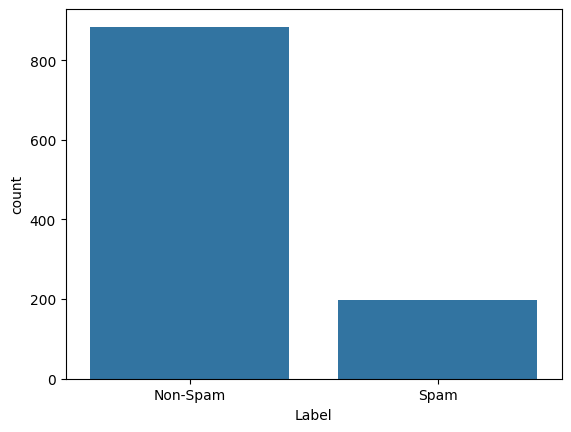

In [ ]:
sns.countplot(x='Label',data=df)

In [ ]:
df.drop(['S. No.'],axis=1,inplace=True)
df

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,Try to do something dear. You read something f...,Non-Spam
1079,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [ ]:
df['Label']=df['Label'].map({'Spam':1,'Non-Spam':0})
df

,Message_body,Label
0,Rofl. Its true to its name,0
1,The guy did some bitching but I acted like i'd...,0
2,"Pity, * was in mood for that. So...any other s...",0
3,Will ü b going to esplanade fr home?,0
4,This is the 2nd time we have tried 2 contact u...,1
...,...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...,0
1078,Try to do something dear. You read something f...,0
1079,Sun ah... Thk mayb can if dun have anythin on....,0
1080,"SYMPTOMS when U are in love: ""1.U like listeni...",0


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
tweet=df.Message_body
tweet

,Message_body
0,Rofl. Its true to its name
1,The guy did some bitching but I acted like i'd...
2,"Pity, * was in mood for that. So...any other s..."
3,Will ü b going to esplanade fr home?
4,This is the 2nd time we have tried 2 contact u...
...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...
1078,Try to do something dear. You read something f...
1079,Sun ah... Thk mayb can if dun have anythin on....
1080,"SYMPTOMS when U are in love: ""1.U like listeni..."


In [ ]:
#tokenization
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
tweet=tweet.apply(lambda x:tk.tokenize(x)).apply(lambda x:' '.join(x))
tweet#x=tweet

,Message_body
0,Rofl . Its true to its name
1,The guy did some bitching but I acted like i'd...
2,"Pity , * was in mood for that . So ... any oth..."
3,Will ü b going to esplanade fr home ?
4,This is the 2nd time we have tried 2 contact u...
...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...
1078,Try to do something dear . You read something ...
1079,Sun ah ... Thk mayb can if dun have anythin on...
1080,"SYMPTOMS when U are in love : "" 1 . U like lis..."


In [ ]:
tweet=tweet.str.replace('[^a-zA-Z0-9]',' ',regex=True)
tweet

,Message_body
0,Rofl Its true to its name
1,The guy did some bitching but I acted like i d...
2,Pity was in mood for that So any oth...
3,Will b going to esplanade fr home
4,This is the 2nd time we have tried 2 contact u...
...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...
1078,Try to do something dear You read something ...
1079,Sun ah Thk mayb can if dun have anythin on...
1080,SYMPTOMS when U are in love 1 U like lis...


In [ ]:
#collect word length above 3.......here majority of stopwords will be removed

from nltk.tokenize import TweetTokenizer
tweet=tweet.apply(lambda x:' '.join([w for w in tk.tokenize(x) if len(w)>=3]))
tweet

,Message_body
0,Rofl Its true its name
1,The guy did some bitching but acted like inter...
2,Pity was mood for that any other suggestions
3,Will going esplanade home
4,This the 2nd time have tried contact have won ...
...,...
1077,wonders WORLD 7th You 6th style 5th smile 4th ...
1078,Try something dear You read something for exams
1079,Sun Thk mayb can dun have anythin Thk have boo...
1080,SYMPTOMS when are love like listening songs ge...


In [ ]:
#stemming====collecting root word and converting into small letter
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweet=tweet.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweet

,Message_body
0,rofl it true it name
1,the guy did some bitch but act like interest b...
2,piti was mood for that ani other suggest
3,will go esplanad home
4,this the 2nd time have tri contact have won th...
...,...
1077,wonder world 7th you 6th style 5th smile 4th p...
1078,tri someth dear you read someth for exam
1079,sun thk mayb can dun have anythin thk have boo...
1080,symptom when are love like listen song get sto...


In [ ]:
#remove stop words
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
tweet=tweet.apply(lambda x:[i for i in tk.tokenize(x)if i not in stop_words]).apply(lambda x:' '.join(x))
tweet

,Message_body
0,rofl true name
1,guy bitch act like interest buy someth els nex...
2,piti mood ani suggest
3,go esplanad home
4,2nd time tri contact 750 pound prize claim eas...
...,...
1077,wonder world 7th 6th style 5th smile 4th perso...
1078,tri someth dear read someth exam
1079,sun thk mayb dun anythin thk book lesson pilat...
1080,symptom love like listen song get stop see nam...


In [ ]:
#vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()
data=vector.fit_transform(tweet)
data

<1082x2854 sparse matrix of type '<class 'numpy.float64'>'
	with 8924 stored elements in Compressed Sparse Row format>

In [ ]:
print(data)

  (0, 2146)	0.6743246681420616
  (0, 2603)	0.5352804139572925
  (0, 1751)	0.5086856793431558
  (1, 1236)	0.26826339572857744
  (1, 559)	0.3752334020731641
  (1, 353)	0.35437558793533497
  (1, 1533)	0.2174075457753962
  (1, 1391)	0.3187189191538061
  (1, 628)	0.2751324774651613
  (1, 2331)	0.2751324774651613
  (1, 972)	0.30392006451010634
  (1, 1779)	0.26514476216742267
  (1, 2741)	0.22799692523276513
  (1, 1167)	0.32809784984076795
  (1, 1122)	0.1977601804079742
  (2, 1930)	0.5469696796701571
  (2, 1708)	0.5469696796701571
  (2, 418)	0.36716239650585775
  (2, 2429)	0.5165656915002457
  (3, 1192)	0.4955435583228749
  (3, 998)	0.7276196298199478
  (3, 1308)	0.47434824349351806
  (4, 176)	0.26181671272503576
  (4, 2543)	0.18612502049180385
  (4, 2599)	0.20589438654271086
  :	:
  (1079, 1522)	0.24774213284441401
  (1079, 2434)	0.26153957460502464
  (1079, 1724)	0.2706898396742334
  (1079, 1852)	0.2706898396742334
  (1079, 1925)	0.2706898396742334
  (1079, 1793)	0.2706898396742334
  (1079, 

In [ ]:
data.shape

(1082, 2854)

In [ ]:
y=df['Label'].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
x=data
x

<1082x2854 sparse matrix of type '<class 'numpy.float64'>'
	with 8924 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

<757x2854 sparse matrix of type '<class 'numpy.float64'>'
	with 6304 stored elements in Compressed Sparse Row format>

In [ ]:
x_test

<325x2854 sparse matrix of type '<class 'numpy.float64'>'
	with 2620 stored elements in Compressed Sparse Row format>

In [ ]:
y_train

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
y_test

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.naive_bayes import MultinomialNB
base=MultinomialNB()
from sklearn.svm import SVC
model=SVC()
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier(criterion='entropy')
lst=[knn,base,model,model1,model2]
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


for i in lst:
  print('model name ',i)
  print('-----------------------------')
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  y_pred
  print('performance is ;')
  print('confusion matrix is',confusion_matrix(y_test,y_pred))
  print('accuracy_score is',accuracy_score(y_test,y_pred))
  print('classification_report is',classification_report(y_test,y_pred))
  print('***********************************')

model name  KNeighborsClassifier()
-----------------------------
performance is ;
confusion matrix is [[269   0]
 [ 52   4]]
accuracy_score is 0.84
classification_report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       269
           1       1.00      0.07      0.13        56

    accuracy                           0.84       325
   macro avg       0.92      0.54      0.52       325
weighted avg       0.87      0.84      0.78       325

***********************************
model name  MultinomialNB()
-----------------------------
performance is ;
confusion matrix is [[269   0]
 [ 21  35]]
accuracy_score is 0.9353846153846154
classification_report is               precision    recall  f1-score   support

           0       0.93      1.00      0.96       269
           1       1.00      0.62      0.77        56

    accuracy                           0.94       325
   macro avg       0.96      0.81      0.87       325
weighted avg